In [1]:
import pyxdf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data3, header = pyxdf.load_xdf('Data/s003.xdf')
exp_data3 = (pd.read_csv('final_exp_decoding/003.csv'))
data4, header = pyxdf.load_xdf('Data/s004.xdf')
exp_data4 = (pd.read_csv('final_exp_decoding/004.csv'))
data5, header = pyxdf.load_xdf('Data/s005.xdf')
exp_data5 = (pd.read_csv('final_exp_decoding/005.csv'))
data6, header = pyxdf.load_xdf('Data/s006.xdf')
exp_data6 = (pd.read_csv('final_exp_decoding/006.csv'))

Stream 2: Calculated effective sampling rate 60.0010 Hz is different from specified rate 90.0000 Hz.
Stream 2: Calculated effective sampling rate 60.0009 Hz is different from specified rate 90.0000 Hz.
Stream 2: Calculated effective sampling rate 60.0010 Hz is different from specified rate 90.0000 Hz.
Stream 2: Calculated effective sampling rate 60.0009 Hz is different from specified rate 90.0000 Hz.


In [3]:
data = [data3, data4, data5, data6]
exp_data = [exp_data3, exp_data4, exp_data5, exp_data6]
marker = 1
tobii = 0
n = 98 # num of trials
t = 4 # num of triggers in each trial
b = 1 # num of blocks

In [36]:
# pupil diameter after reward
triggers = [data[i][marker]['time_stamps'] for i in range(4)]
reward_triggers = []
fixation_triggers = []
for i in range(4):
    reward_triggers.append([triggers[i][j] for j in range(3, n * t * b, t)])
    fixation_triggers.append([triggers[i][j] for j in range(0, n * t * b, t)])
eye_data = []
win = [] 
lose = []
pupil_diameter = []
for k in range(4):
    temp1 = data[k][tobii]['time_series'][0:, 30]
    temp2 = data[k][tobii]['time_series'][0:, 29]
    temp = (temp1 + temp2) / 2
    eye_data.append((temp - np.nanmean(temp)) / np.nanstd(temp)) # normalize the data
    j = 0
    for i in range(97):
        sum_d = 0
        start = reward_triggers[k][i]
        
        while (data[k][tobii]['time_stamps'][j] < start):
            j += 1
        #j=j-10
        l = j
        while (data[k][tobii]['time_stamps'][l] < fixation_triggers[k][i + 1]):
            l += 1
        for p in range(l - j):
            if (not (np.isnan(eye_data[k][j]))):
                sum_d += eye_data[k][j]
            j += 1 
        if (exp_data[k][' reward'][i] == 1):
            pupil_diameter.append((k, sum_d / 30, 'Win'))
        else:
            pupil_diameter.append((k, sum_d / 30, 'Lose'))

Text(0, 0.5, 'Pupil dilation')

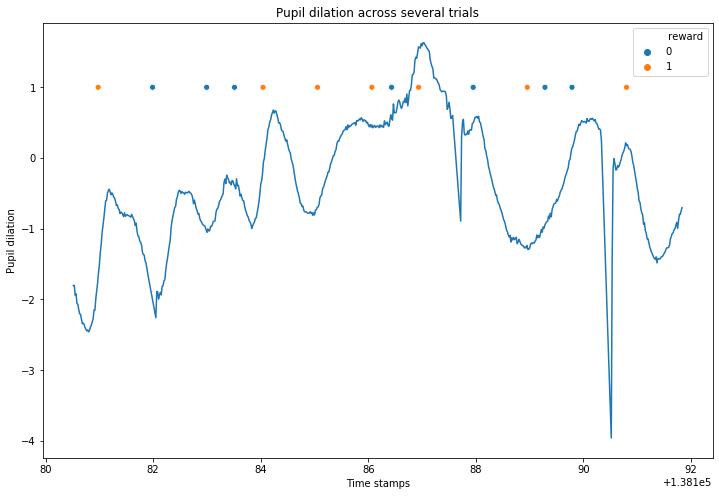

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(data[0][0]['time_stamps'][20:700], eye_data[0][20:700]-1)
reward=exp_data[0][' reward']
sns.scatterplot(data[0][1]['time_stamps'][1:15],[1 for _ in range(n)][1:15],marker='o',hue=reward[1:15])# [all_data[i] for i in range(3,n*b*t,t)][0:90]
plt.title("Pupil dilation across several trials") #title
plt.xlabel("Time stamps") #x label
plt.ylabel("Pupil dilation")

In [33]:
difference=[]
for i in range(4):
        difference.append(np.mean(win[i]) - np.mean(lose[i]))
difference

[0.38266009073804264,
 -0.6587013340530969,
 0.05964567208316707,
 0.2884833587118899]

C:\Users\shakeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shakeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


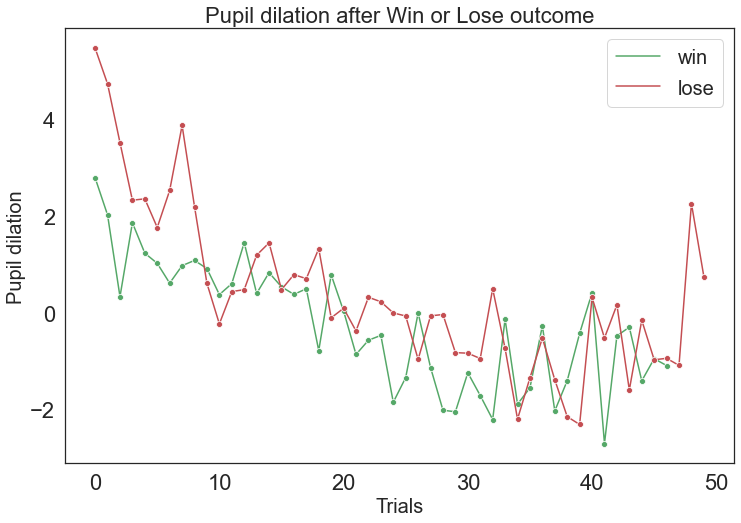

In [10]:
plt.figure(figsize=(12, 8))
subject = 1
wins = win[subject]
loses = lose[subject]
arr = [i for i in range(60)]
ax = sns.lineplot(arr[:len(wins)], wins, marker='o', palette=['g'], hue=['win' for i in range(len(wins))])
sns.lineplot(arr[:len(loses)], loses, marker='o', palette=['r'], hue=['lose' for i in range(len(loses))])
plt.title("Pupil dilation after Win or Lose outcome", fontsize=22) 
plt.xlabel("Trials", fontsize=20) 
plt.ylabel("Pupil dilation", fontsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
sns.set(font_scale=2.5, style='white')

Text(0.5, 1.0, 'Average pupil dilation after wins or loses')

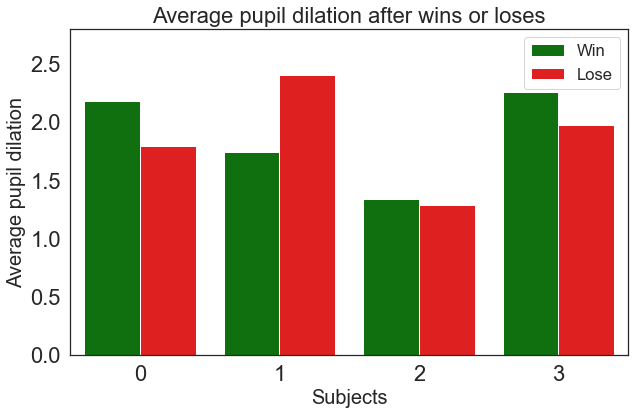

In [47]:
diameter_df = pd.DataFrame(data=pupil_diameter, columns=['subject', 'diameter', 'title'])
diameter_df['diameter'] += 2
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=diameter_df, x='subject', y='diameter', hue='title', palette=['green', 'red'], ci=None)
ax.set_ylabel("Average pupil dilation", fontsize=20)
ax.set_xlabel('Subjects', fontsize=20)
plt.ylim((0, 2.8))
plt.legend(loc='best', fontsize='x-small')
# plt.setp(ax.get_legend().get_texts(), fontsize=16) 
plt.title('Average pupil dilation after wins or loses', fontsize=22)

In [27]:
# pupil diameter during choice
stimulus_triggers = []
choice_triggers = []
for i in range(4):
    stimulus_triggers.append([triggers[i][j] for j in range(1, n * t * b, t)])
    choice_triggers.append([triggers[i][j] for j in range(2, n * t * b, t)])
strategy = []
change_strategy = [] 
same_strategy = []
for k in range(4):
    change_sub = []
    same_sub = []
    j = 0
    for i in range(1, 98):
        sum_d = 0
        start = stimulus_triggers[k][i]
        end = choice_triggers[k][i]
        avg = 0
        while (data[k][tobii]['time_stamps'][j] < start):
            j += 1
        while (data[k][tobii]['time_stamps'][j] < end):
            avg += 1
            if (not (np.isnan( eye_data[k][j]))):
                sum_d += eye_data[k][j]
            j += 1 
        if avg == 0:
            continue
        if (exp_data[k][' chosen_card'][i] != exp_data[k][' chosen_card'][i - 1]):
            same_sub.append(sum_d / avg)
            strategy.append((k, sum_d / avg, 'Change'))
        else:
            change_sub.append(sum_d / avg)
            strategy.append((k, sum_d / avg, 'Same'))
    same_strategy.append(same_sub)
    change_strategy.append(change_sub)     

In [11]:
difference=[]
for i in range(4):
        difference.append(np.mean(change_strategy[i]) - np.mean(same_strategy[i]))
difference

[0.05976670784113336,
 0.16515198302163972,
 -0.0071549284201785635,
 -0.15713762344218415]

C:\Users\shakeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shakeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


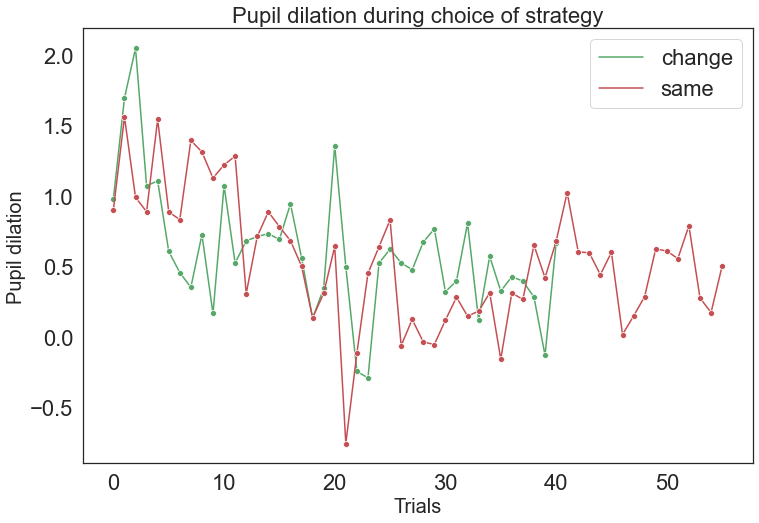

In [16]:
plt.figure(figsize=(12, 8))
subject = 0
changes = change_strategy[subject]
sames = same_strategy[subject]
arr = [i for i in range(100)]
sns.lineplot(arr[:len(changes)], changes, marker='o', palette=['g'], hue=['change' for i in range(len(changes))])
sns.lineplot(arr[:len(sames)], sames, marker='o', palette=['r'], hue=['same' for i in range(len(sames))])
plt.title("Pupil dilation during choice of strategy", fontsize=22)
plt.xlabel("Trials", fontsize=20) 
plt.ylabel("Pupil dilation", fontsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=18) 
sns.set(font_scale=2, style='white')

(0.0, 1.8)

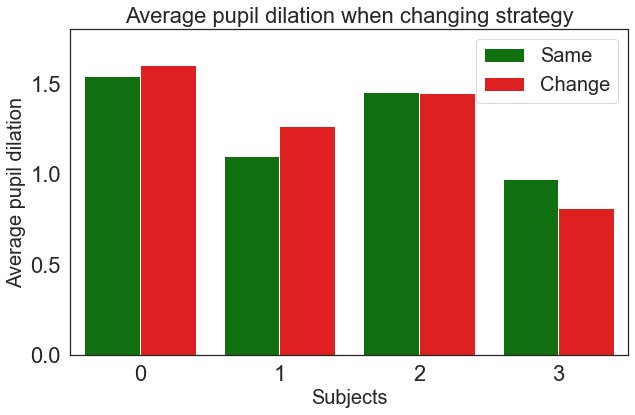

In [35]:
strategy_df = pd.DataFrame(data=strategy, columns=['subject', 'strategy', 'title'])
strategy_df['strategy'] += 1
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=strategy_df, x='subject', y='strategy', hue='title', palette=['green', 'red'], ci=None)
ax.set_ylabel("Average pupil dilation", fontsize=20)
ax.set_xlabel('Subjects', fontsize=20)
plt.legend(loc='best', fontsize='small')
plt.title('Average pupil dilation when changing strategy', fontsize=22)
plt.ylim((0, 1.8))